**Домашнее задание №1 (Математические основы машинного обучения)**

# 1.  Выполните визуализацию данных с использованием библиотеки Pandas:

 - Попробуйте разные виды графиков для числовых признаков – скатерограммы, гистограммы, и т. д. 
 - Для скатерограмм попробуйте использовать категориальные данные для таких параметров графиков, как оттенок (hue), тип маркера (style) и числовые признаки для размер маркера (size). Таким образом, вы можете объединить информацию о нескольких признаков в один двумерный график. 
 - Визуализируйте как минимум 3 Новых визуализации данных.

In [1]:
#Import библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Для итерактивных графиков
!pip install pandas-bokeh

import pandas_bokeh
pandas_bokeh.output_notebook()

from google.colab import files 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#посчитаем файлы:
DF = pd.read_csv('/content/drive/MyDrive/lectures/mf-ml/colab/dz/1/dates/cars_moldova_clean.csv', delimiter = ',') 

In [3]:
#переименуем столбцы:
DF.rename(
    columns = ({'Engine_capacity(cm3)': 'Engine_capacity', 'Price(euro)': 'Price_euro'}), 
    inplace = True
    )

In [4]:
#предварительно обработаем данные:
cat_columns = []
num_columns = []
for column_name in DF.columns:
  if (DF[column_name].dtypes == object):
    cat_columns +=[column_name]
  else:
    num_columns +=[column_name]

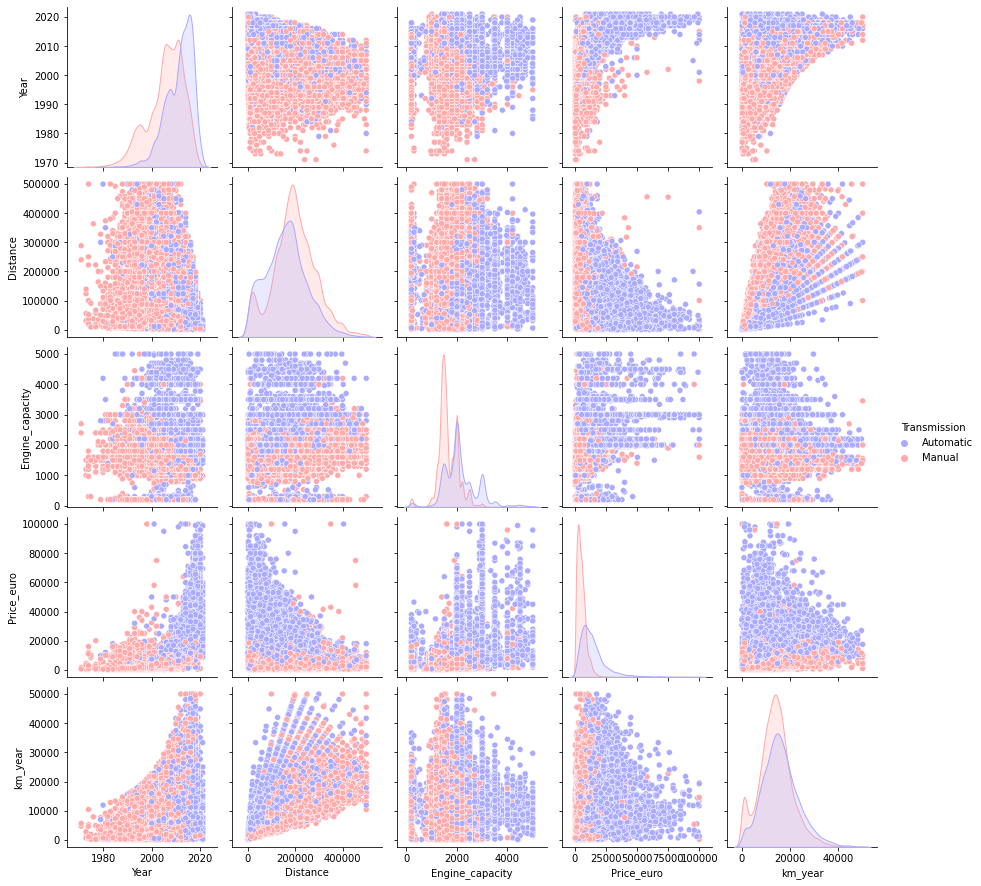

In [5]:
# визуализация данных:
sns.pairplot(data = DF,
             hue = 'Transmission',
             palette = 'bwr')
             

# Скатерограммы
#* Км/г сред. - Дистанция

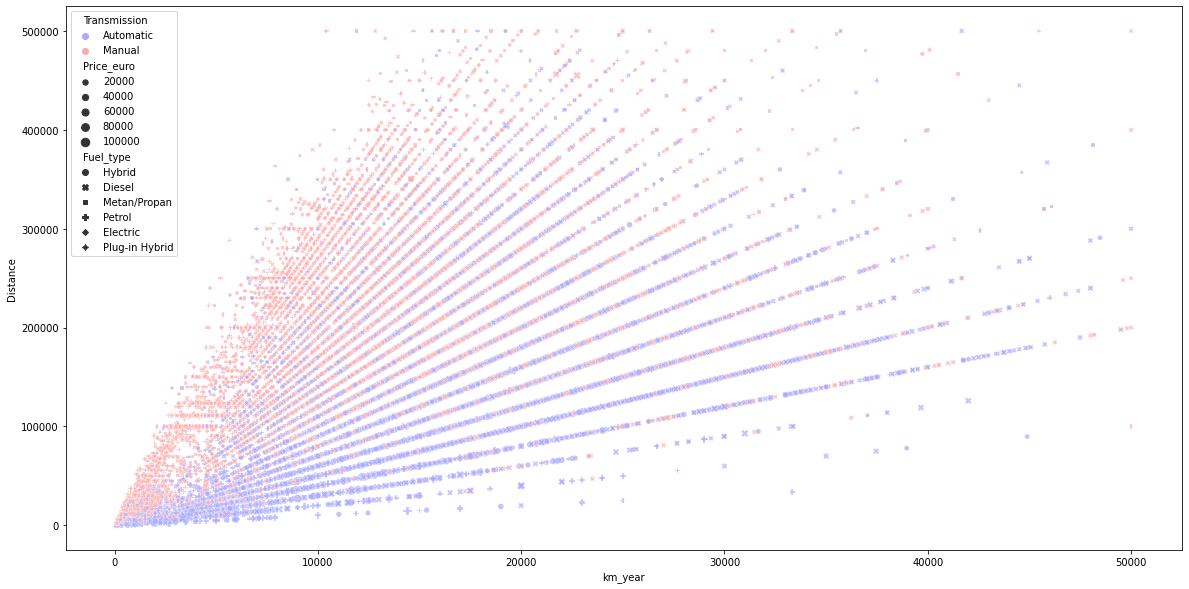

In [6]:
plt.figure(figsize = (20,10))
sns.scatterplot(
    data = DF, 
    x = 'km_year', y = 'Distance', 
    hue = 'Transmission', style = 'Fuel_type',
    size = 'Price_euro', 
    alpha = 0.7,
    palette = 'bwr'
    )

Км/г сред. - Год выпуска

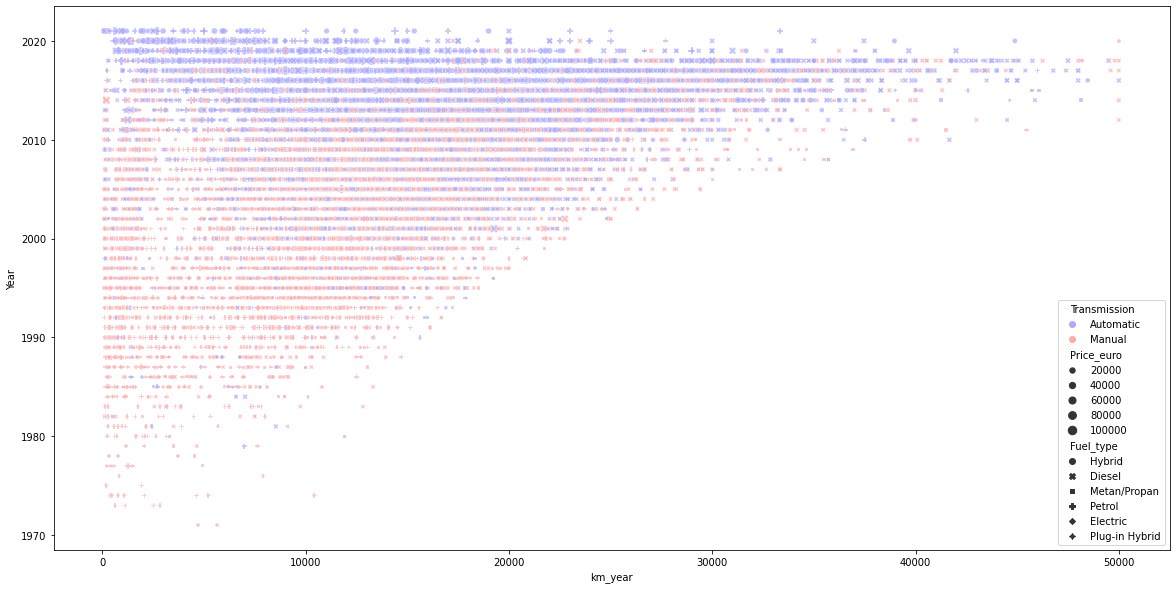

In [7]:
plt.figure(figsize = (20,10))
sns.scatterplot(
    data = DF,
    x = 'km_year', y = 'Year',
    hue = 'Transmission', style = 'Fuel_type',
    size = 'Price_euro', 
    alpha = 0.7,
    palette = 'bwr'
)

Гистограммы

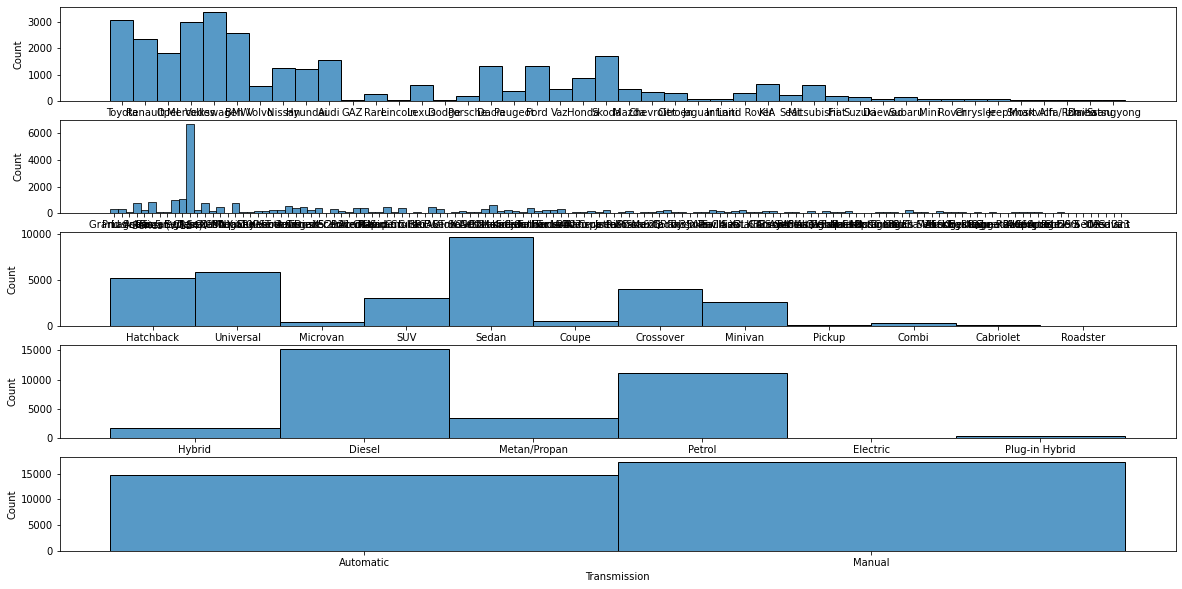

In [8]:
width = 1
height = int(np.ceil(len(cat_columns)/width))

fig, ax = plt.subplots(nrows = height, ncols = width, figsize = (20, 10))

for idx, column_name in enumerate(cat_columns):
  plt.subplot(height, width, idx+1)

  sns.histplot(data = DF, x=column_name, bins = 20);

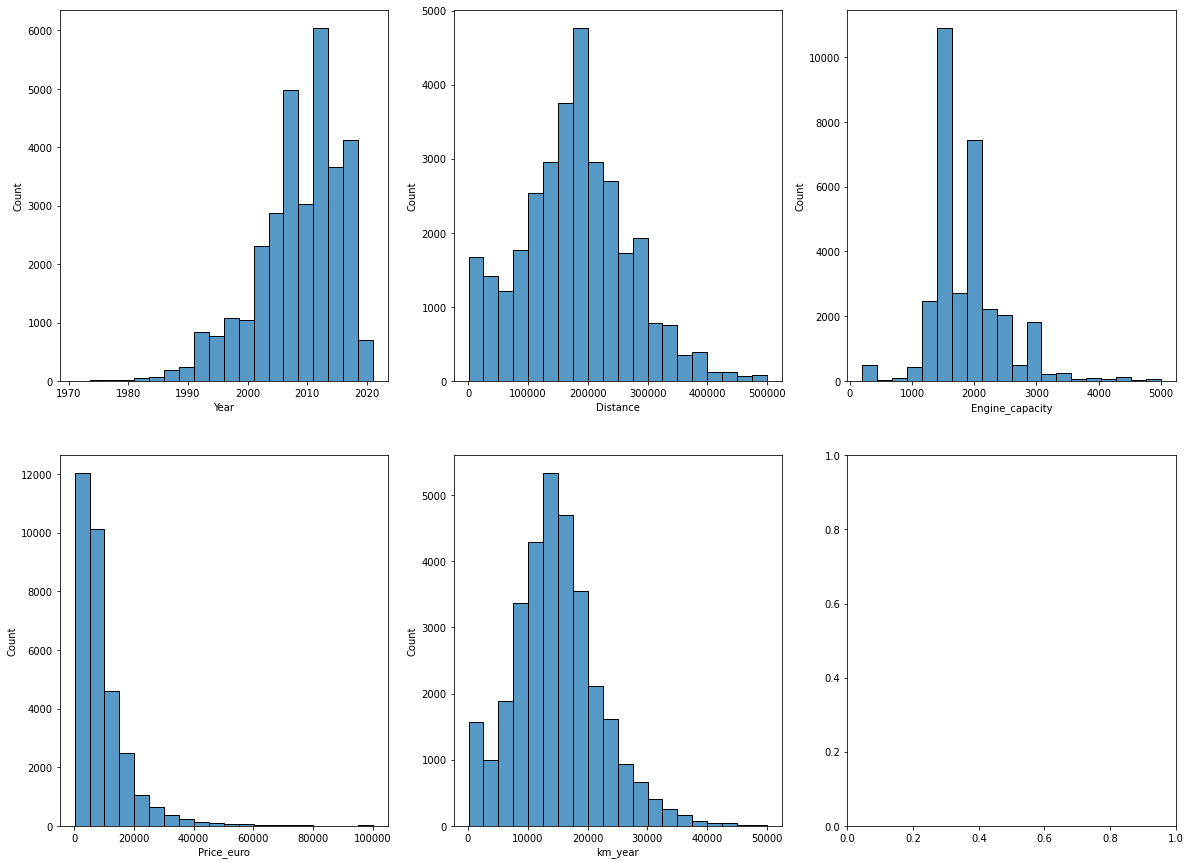

In [9]:
# Общие Числовые
width = 3
height = int(np.ceil(len(num_columns)/width))

fig, ax = plt.subplots(nrows = height, ncols = width, figsize = (20, 15))

for idx, column_name in enumerate(num_columns):
  plt.subplot(height, width, idx+1)

  sns.histplot(data = DF, 
               x=column_name, 
               bins = 20);

Интерактивный график

 Год-Цена-Производитель

In [10]:
DF.plot_bokeh.scatter(
    x="Year",
    y="Price_euro",
    category="Make",
    legend=False,
    figsize=(1500,750)
)

/usr/local/lib/python3.8/dist-packages/pandas_bokeh/plot.py:1332: UserWarning: There are more than 5 categories in the scatterplot. The legend might be crowded, to hide the axis you can pass 'legend=False' as an optional argument.
  warnings.warn(


Figure(id='1002', ...)

# 2.  Попытайтесь добавить в модель дополнительные признаки на основе имеющихся:

Введение квантиниальных категорий для столбца Km_Year


* 'low'(С небольшим пробегом) до 25%
* 'medium'(Со средним пробегом) от 25 до 75%
* 'large'(С большим пробегом) от 75%

In [11]:
#выборка и присваивание значений новому столбцу по условию:
DF.loc[(DF['km_year'] <= DF.km_year.quantile(.25)), 'Dis_rating'] = 'low'
DF.loc[
    (DF.km_year > DF.km_year.quantile(.25)) & 
    (DF.km_year <= DF.km_year.quantile(.75)), 'Dis_rating'
    ] = 'medium'
DF.loc[DF.km_year > DF.km_year.quantile(.75), 'Dis_rating'] = 'large'

б) "Умная" замена катагории 'Rare'

* 'Rare_Cheap'(Дешевый)
* 'Rare_Good'(Дорогие)

In [12]:
##Выборка и замена значений по условию
rate_count = DF[DF['Make'] == 'Rare']
rate_median = rate_count['Price_euro'].median()
DF.loc[(DF['Make'] == 'Rare') & (DF['Price_euro'] <= rate_median), 'Make'] = 'Rare_Cheap'
DF.loc[(DF['Make'] == 'Rare') & (DF['Price_euro'] > rate_median), 'Make'] = 'Rare_Good'

в) Добавление принака "Налоговый коэфицент"


Дорожный налог 2022 году в Молдове. (куб. см):

* до 2000 куб.см включительно куб.см - 0,60
* от 2001 до 3000 куб.см включительно куб.см - 0,90
* от 3001 до 4000 куб.см включительно куб.см - 1,20
* от 4001 до 5000 куб.см включительно куб.см - 1,50
* свыше 5000 куб.см куб.см - 1,80

In [13]:
def nalog_cof(cof):
  if (cof <= 2000): return 0.6
  if (2000 < cof <= 3000): return 0.9
  if (3000 < cof <= 4000): return 1.2
  if (4000 < cof <= 5000): return 1.5
  if (5000 < cof): return 1.8

DF['Nalog_cof'] = DF['Engine_capacity'].apply(nalog_cof)

In [14]:
DF['Nalog_cof'].value_counts()

0.6    24529
0.9     6620
1.2      626
1.5      299
Name: Nalog_cof, dtype: int64

г) Добавление признака "Конвертация в RU"

In [15]:
curs_Eu_RU = 62.38
DF['Price_Ru'] = DF['Price_euro']*curs_Eu_RU

д) Кореляция

In [16]:
cm = sns.color_palette("vlag", as_cmap=True)
DF.corr().style.background_gradient(cmap=cm, vmin = -1, vmax=1)

,Year,Distance,Engine_capacity,Price_euro,km_year,Nalog_cof,Price_Ru
Year,1.000000,-0.431808,-0.026269,0.551700,0.443895,-0.042723,0.551700
Distance,-0.431808,1.000000,0.073667,-0.358394,0.446684,0.090427,-0.358394
Engine_capacity,-0.026269,0.073667,1.000000,0.383766,-0.010049,0.835402,0.383766
Price_euro,0.551700,-0.358394,0.383766,1.000000,0.164468,0.317059,1.000000
km_year,0.443895,0.446684,-0.010049,0.164468,1.000000,-0.006207,0.164468
Nalog_cof,-0.042723,0.090427,0.835402,0.317059,-0.006207,1.000000,0.317059
Price_Ru,0.551700,-0.358394,0.383766,1.000000,0.164468,0.317059,1.000000


Признак Price_Ru(цена в руб.) демострирует сто процентную зависимость от Price_Eu(цена в евро)
Признак Nalog_Cof(налоговый коэфицент от объема движка) демонстрирует среднею зависимость от цены, т.к. кол-во диапозонов налогового коэфицента слишком мало для хорешей(0.5) зависимости

# 3.  Выполните предварительную обработку данных. 

- Сохраните результаты разных методов предварительной обработки в разные файлы, чтобы потом у вас была возможность протестировать различные гипотезы на моделях. 
- Под разными методами подразумевается стандартизация, нормализация и степенное преобразование для числовых признаков, и Ordinal / One-Hot Encoding для категориальных.

Предварительно сохранение файла с новыми категориями

In [17]:
DF.to_csv('/content/drive/MyDrive/lectures/mf-ml/colab/dz/1/dates/cars_moldova_clean-v2.csv', index = False)

In [18]:
DF = DF.reset_index(drop=True)

#повторим распределение типов столбиков из-за введения новых столбиков:
cat_columns = []
num_columns = []
for column_name in DF.columns:
  if (DF[column_name].dtypes == object):
    cat_columns +=[column_name]
  else:
    num_columns +=[column_name]

а) Стандартизация

In [19]:
DF_scaled = DF.copy()
#Среднее
M = DF[num_columns].mean()
#Ст.отклонение
STD = DF[num_columns].std()
#согласно формуле из лекции.
#Кроме того можно бы воспользоваться prep.standartScaler().fit(DF[num_columns])
DF_scaled[num_columns] = (DF[num_columns]-M)/STD

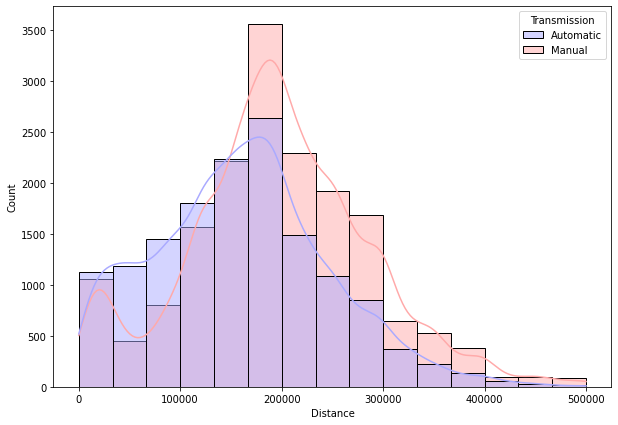

In [20]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = DF,
             x = 'Distance',
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')

График Трансмиссия - Дистанция до стандартизации

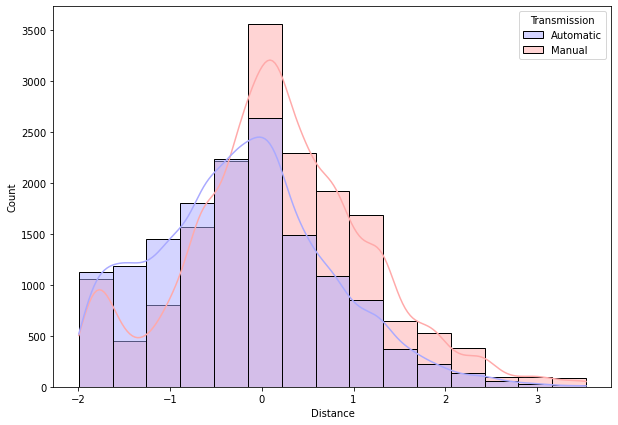

In [21]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = DF_scaled,
             x = 'Distance', 
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')

Маштаб графика после Стандартизации и стал [-2; 4]

In [22]:
DF_scaled.to_csv('/content/drive/MyDrive/lectures/mf-ml/colab/dz/1/dates/cars_moldova_STD.csv', index = False)

б) Нормализация

In [23]:
DF_norm  = DF.copy()
#Находим макс и мин значение числовых столбиков
Xmin = DF[num_columns].min()
Xmax = DF[num_columns].max()
#По формуле из лекции
#Кроме того можно было воспользоваться prep.MinMaxScaler().fit()
DF_norm[num_columns] = (DF[num_columns] - Xmin) / (Xmax - Xmin)

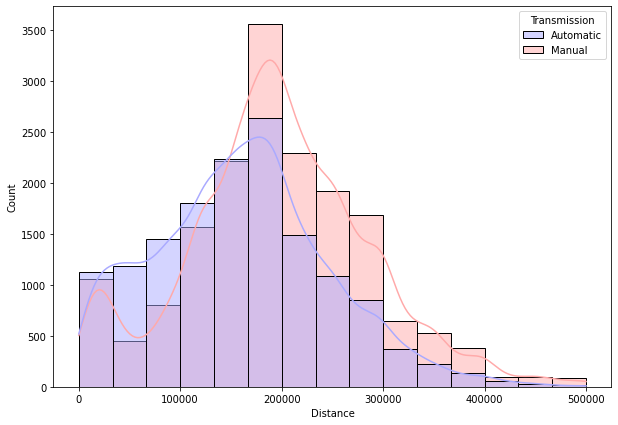

In [24]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = DF,
             x = 'Distance',
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')

График до нормализации

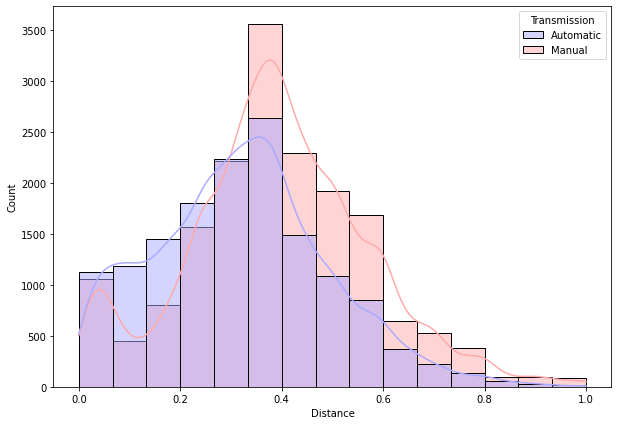

In [25]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = DF_norm,
             x = 'Distance',
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')

График после нормализации. Маштаб был преобразован [0; 1]

In [26]:
DF_norm.to_csv('/content/drive/MyDrive/lectures/mf-ml/colab/dz/1/dates/cars_moldova_NORM.csv', index = False)

в) Степенное преобразование (log)

In [27]:
DF_power  = DF.copy()
#Преобразование значений через нат.логорифм
#Кроме того можно воспользоваться prep.PowerTransform().fit()
DF_power[num_columns] = np.log(DF_power[num_columns])
M = DF_power[num_columns].mean()
STD = DF_power[num_columns].std()
DF_power[num_columns] = (DF_power[num_columns]-M)/STD

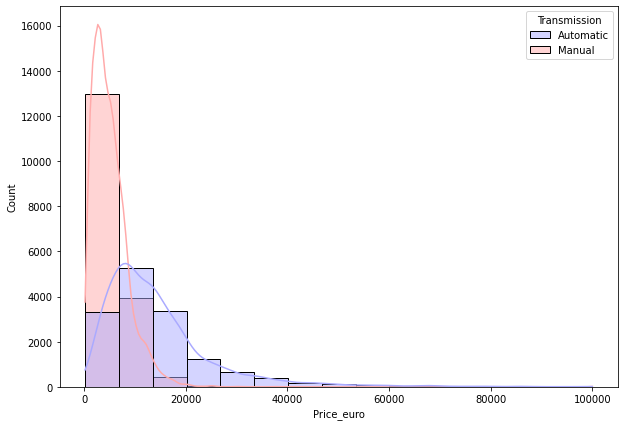

In [28]:
fig = plt.figure(figsize=(10,7))

sns.histplot(data = DF, 
             x = 'Price_euro', 
             hue = 'Transmission', 
             bins = 15, kde = True,
             palette='bwr')

График до преобразования

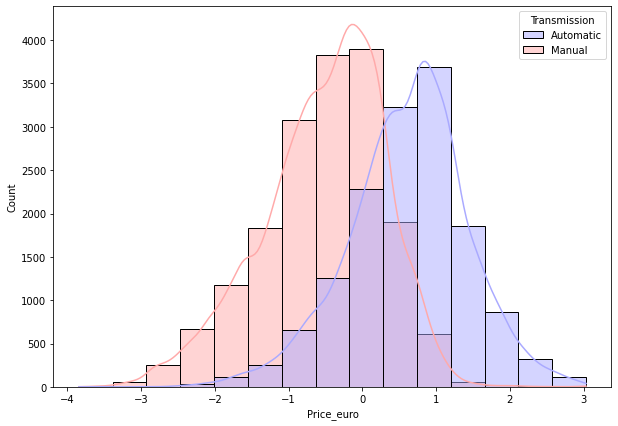

In [29]:
fig = plt.figure(figsize=(10,7))

sns.histplot(data = DF_power, 
             x = 'Price_euro', 
             hue = 'Transmission', 
             bins = 15, kde = True,
             palette='bwr')


Преобразование привело график к нормальному распределению

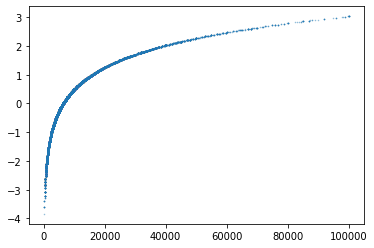

In [30]:
plt.plot(DF['Price_euro'], DF_power['Price_euro'], '.', alpha = 0.5, markersize = 1)

На графике наблюдается логорифмическая зависимость

In [31]:
DF_power.to_csv('/content/drive/MyDrive/lectures/mf-ml/colab/dz/1/dates/cars_moldova_STD.csv', index = False)

г) Бинарный признак


In [32]:
DF_ce = DF.copy()
#Изменяем тип для категориальных столбиков
DF_ce[cat_columns] = DF_ce[cat_columns].astype('category')
#Через цикл присваем ячейкам числовые значения категории
for _, column_name in enumerate(cat_columns):
  DF_ce[column_name] = DF_ce[column_name].cat.codes

In [33]:
DF_ce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32074 entries, 0 to 32073
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Make             32074 non-null  int8   
 1   Model            32074 non-null  int16  
 2   Year             32074 non-null  int64  
 3   Style            32074 non-null  int8   
 4   Distance         32074 non-null  float64
 5   Engine_capacity  32074 non-null  float64
 6   Fuel_type        32074 non-null  int8   
 7   Transmission     32074 non-null  int8   
 8   Price_euro       32074 non-null  float64
 9   km_year          32074 non-null  float64
 10  Dis_rating       32074 non-null  int8   
 11  Nalog_cof        32074 non-null  float64
 12  Price_Ru         32074 non-null  float64
dtypes: float64(6), int16(1), int64(1), int8(5)
memory usage: 1.9 MB


In [34]:
DF_ce.head(5)

,Make,Model,Year,Style,Distance,Engine_capacity,Fuel_type,Transmission,Price_euro,km_year,Dis_rating,Nalog_cof,Price_Ru
0,41,92,2011,4,195000.0,1800.0,2,0,7750.0,17727.272727,2,0.6,483445.0
1,33,62,2014,11,135000.0,1500.0,0,1,8550.0,16875.000000,2,0.6,533349.0
2,33,71,2012,11,110000.0,1500.0,0,1,6550.0,11000.000000,2,0.6,408589.0
3,28,23,2006,11,200000.0,1600.0,3,1,4100.0,12500.000000,2,0.6,255758.0
4,23,124,2000,5,300000.0,2200.0,0,1,3490.0,13636.363636,2,0.9,217706.2


In [35]:
DF_ce.to_csv('/content/drive/MyDrive/lectures/mf-ml/colab/dz/1/dates/cars_moldova_cat_num.csv', index = False)

д) One-hot Кодирование

In [36]:
DF_ohe = pd.get_dummies(DF.copy())

In [37]:
DF_ohe.tail()

,Year,Distance,Engine_capacity,Price_euro,km_year,Nalog_cof,Price_Ru,Make_Alfa Romeo,Make_Audi,Make_BMW,...,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid,Transmission_Automatic,Transmission_Manual,Dis_rating_large,Dis_rating_low,Dis_rating_medium
32069,2016,88000.0,1800.0,11500.0,14666.666667,0.6,717370.0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
32070,2002,225000.0,1800.0,4400.0,11250.000000,0.6,274472.0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
32071,2015,89000.0,1500.0,7000.0,12714.285714,0.6,436660.0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
32072,2006,370000.0,2000.0,4000.0,23125.000000,0.6,249520.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
32073,2006,300000.0,1500.0,4000.0,18750.000000,0.6,249520.0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [38]:
DF_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32074 entries, 0 to 32073
Columns: 209 entries, Year to Dis_rating_medium
dtypes: float64(6), int64(1), uint8(202)
memory usage: 7.9 MB


In [39]:
DF_ohe.to_csv('/content/drive/MyDrive/lectures/mf-ml/colab/dz/1/dates/cars_moldova_onehot.csv', index = False)